In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

from src.ou_noise import OUNoise
from src.ddpg import EpsilonDecayLinear
from src.experience import ExperienceSorceDiscountedSteps
from src.ddpg import DDPGActor, DDPGCritic, DDPGPolicy, DDPGAgent

GAMMA = 0.99
LEARNING_RATE = 0.001
N_STEPS = 4
BATCH_SIZE = 32
CHECKPOINT_PATH = os.path.join("models", "05_pendulum_ac.tar")

env = gym.make("Pendulum-v0")
test_env = gym.make("Pendulum-v0")
device = torch.device("cpu")
act_net = DDPGActor(
    env.observation_space.shape[0], env.action_space.shape[0]
).to(device)
crt_net = DDPGCritic(
    env.observation_space.shape[0], env.action_space.shape[0]
).to(device)

agent = DDPGAgent(
    env=env,
    test_env=test_env,
    act_net=act_net,
    crt_net=crt_net,
    noise=OUNoise(mu=0.0, theta=0.0, sigma=0.2),
    eps_schedule=EpsilonDecayLinear(max_steps=5000),
    device=device,
    gamma=GAMMA,
    lr=LEARNING_RATE,
    n_steps=N_STEPS,
    batch_size=BATCH_SIZE,
    chk_path=None,
    # chk_path=CHECKPOINT_PATH,
    norm_rewards=True,
)

In [2]:
agent.exp_train_source.render = False
agent.learn(10000, verbose_every=1000)
# agent.plot_performance()

 10%|█         | 1021/10000 [00:06<00:57, 155.95it/s]
 1000: loss=-0.725682,  mean reward=-1368.24,  steps/ep=200,  episodes=20
 20%|██        | 2030/10000 [00:13<00:55, 143.74it/s]
 2000: loss=-3.640204,  mean reward=-1326.36,  steps/ep=200,  episodes=40
 30%|███       | 3027/10000 [00:20<00:44, 157.50it/s]
 3000: loss=-2.707229,  mean reward=-1226.62,  steps/ep=200,  episodes=60
 40%|████      | 4019/10000 [00:27<00:38, 155.44it/s]
 4000: loss=-2.885595,  mean reward=-1119.73,  steps/ep=200,  episodes=80
 50%|█████     | 5031/10000 [00:33<00:32, 155.19it/s]
 5000: loss=-2.535786,  mean reward=-1054.33,  steps/ep=200,  episodes=100
 60%|██████    | 6013/10000 [00:40<00:27, 145.26it/s]
 6000: loss=-3.518280,  mean reward=-928.52,  steps/ep=200,  episodes=120
 70%|███████   | 7021/10000 [00:46<00:19, 153.55it/s]
 7000: loss=-2.531766,  mean reward=-783.34,  steps/ep=200,  episodes=140
 80%|████████  | 8019/10000 [00:53<00:12, 158.46it/s]
 8000: loss=-3.558586,  mean reward=-674.84,  ste

In [3]:
agent.exp_train_source.render = True
agent.exp_train_source.play_episode()
env.close()

In [10]:
agent.exp_test_source.render = True
agent.exp_test_source.play_episode()
test_env.close()

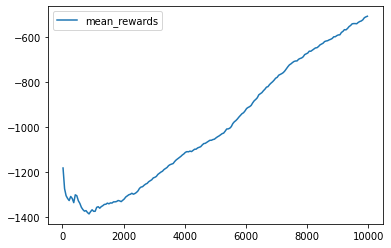

In [5]:
agent.plot_performance(['mean_rewards'])

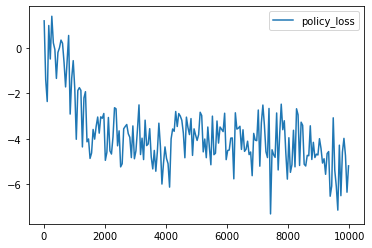

In [6]:
agent.plot_performance(['policy_loss'])

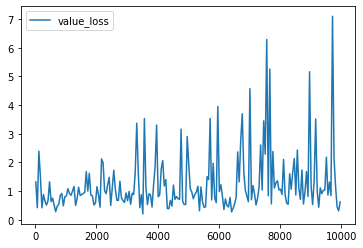

In [7]:
agent.plot_performance(['value_loss'])


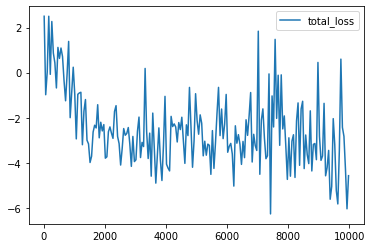

In [8]:
agent.plot_performance(['total_loss'])
